# YOLOv8 + ByteTrack Image Inference FPS Benchmark
This notebook benchmarks the average FPS for running YOLOv8 + ByteTrack on a batch of images from the frames_511ny folder.

In [9]:
# Import Required Libraries
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import glob
import pandas as pd

# Load Sample Images
This section loads all sample images from the frames_511ny folder for benchmarking.

Found image files: ['../frames_511ny/Skyline-13982_1755530682.jpg', '../frames_511ny/NYSDOT-tkt520zcnfz_1755530881.jpg', '../frames_511ny/Skyline-5557_1755530331.jpg', '../frames_511ny/Skyline-5557_1755530815.jpg', '../frames_511ny/NYSDOT-tkt520zcnfz_1755530397.jpg', '../frames_511ny/Skyline-13982_1755530198.jpg', '../frames_511ny/Skyline-13982_1755531079.jpg', '../frames_511ny/NYSDOT-tkt520zcnfz_1755531098.jpg', '../frames_511ny/Skyline-16133_1755530265.jpg', '../frames_511ny/Skyline-5557_1755531091.jpg', '../frames_511ny/Skyline-16133_1755530748.jpg', '../frames_511ny/Skyline-16133_1755531085.jpg']


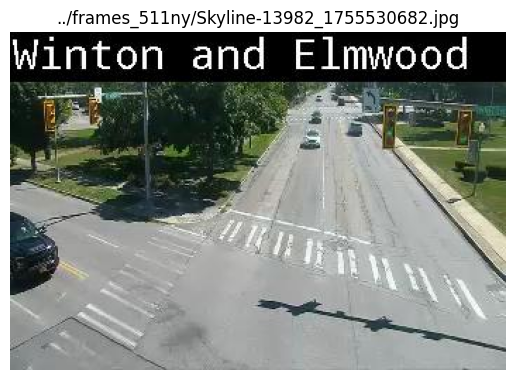

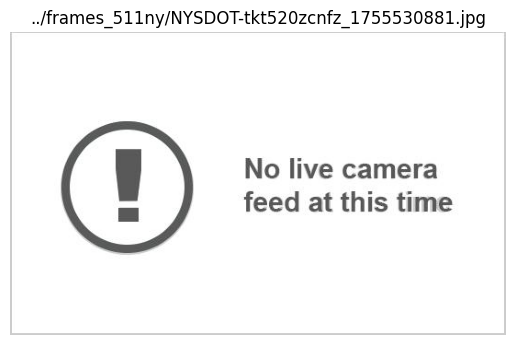

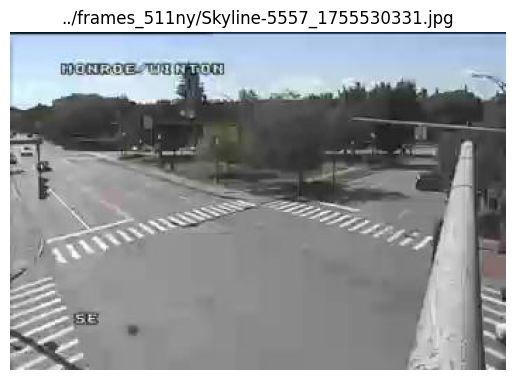

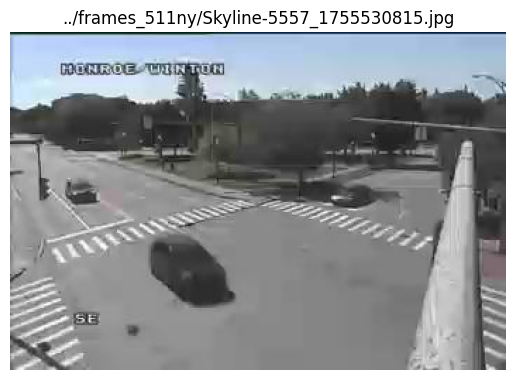

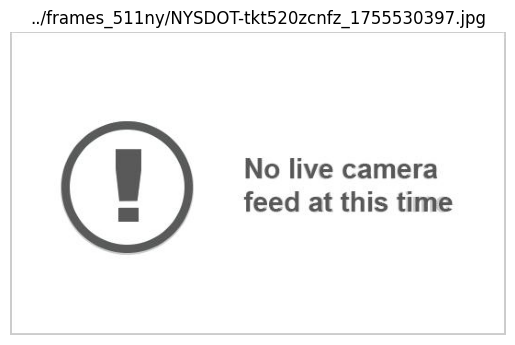

In [10]:
# Load Sample Images
image_dir = '../frames_511ny/'
image_files = glob.glob(image_dir + '*.jpg')
print('Found image files:', image_files)

# Preview first few images
for img_path in image_files[:5]:
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(img_path)
    plt.axis('off')
    plt.show()

# Define Image FPS Benchmarking Function
This section defines a function to process images and calculate FPS for detection/tracking.

In [11]:
# Define Image FPS Benchmarking Function
def benchmark_image_fps(image_files, model):
    start_time = time.time()
    frame_count = 0
    for img_path in image_files:
        img = cv2.imread(img_path)
        _ = model.track(img, persist=True, tracker="bytetrack.yaml")
        frame_count += 1
    elapsed = time.time() - start_time
    fps = frame_count / elapsed if elapsed > 0 else 0
    return fps, frame_count, elapsed

# Run Image FPS Benchmark
This section runs the benchmarking function on all sample images and records the FPS result.

In [12]:
# Run Image FPS Benchmark
model = YOLO('yolov8n.pt')
fps, frame_count, elapsed = benchmark_image_fps(image_files, model)
print(f"Processed {frame_count} images in {elapsed:.2f} seconds.")
print(f"Average FPS: {fps:.2f}")


0: 448x640 4 cars, 1 traffic light, 43.4ms
Speed: 1.2ms preprocess, 43.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 4 cars, 1 traffic light, 43.4ms
Speed: 1.2ms preprocess, 43.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 416x640 (no detections), 35.8ms
Speed: 1.0ms preprocess, 35.8ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 (no detections), 35.8ms
Speed: 1.0ms preprocess, 35.8ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)

0: 448x640 1 car, 1 airplane, 1 truck, 36.5ms
Speed: 1.1ms preprocess, 36.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 car, 1 airplane, 1 truck, 36.5ms
Speed: 1.1ms preprocess, 36.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 car, 1 truck, 42.7ms
Speed: 1.2ms preprocess, 42.7ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 car, 1 truck, 42.7

# Display Image Benchmark Results
This section visualizes the average FPS result for image inference.

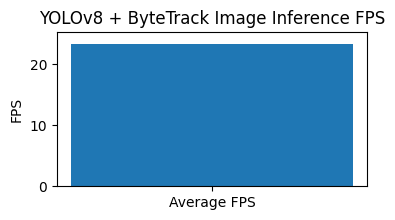

In [13]:
# Display Image Benchmark Results
plt.figure(figsize=(4,2))
plt.bar(['Average FPS'], [fps])
plt.ylabel('FPS')
plt.title('YOLOv8 + ByteTrack Image Inference FPS')
plt.ylim(0, max(10, fps+2))
plt.show()